# TARUN SUNKARANENI'S Hierarchical and Point-Clustering Notebook Pt. 2

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [3]:
c1 = pd.read_csv("../input/C1.csv", names=['x0', 'x1'])

# Complete-Link Hierarchical
### Complete-Link: measures the shortest link as 
$\displaystyle{\textbf{d}(S_1,S_2) = \max_{(s_1,s_2) \in S_1 \times S_2} \|s_1 - s_2\|_2}$. 

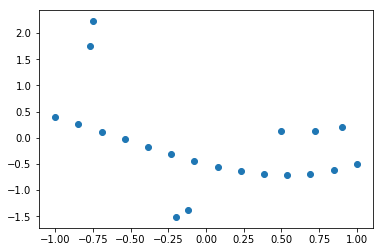

In [3]:
plt.scatter(c1['x0'],c1['x1'])

In [4]:
def complete_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = -1
# this is different from the complete link in that we try to minimize the MAX distance
# between CLUSTERS
                # go through every point in this prospective cluster as well
                # for each point in each cluster
                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):
# make sure that our furthest distance holds the maximum distance betweeen the clusters at focus
                        if furthest_cluster_dist < distance.euclidean(point,point2): 
                            furthest_cluster_dist = distance.euclidean(point,point2)
# We are now trying to minimize THAT furthest dist
                if furthest_cluster_dist < closest_distance:
                    closest_distance = furthest_cluster_dist
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
               # extend just appends the contents to the list without flattening it out
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        # don't need this index anymore, and we have just clustered once more
        clusters.pop(clust_2) 
    return(clusters)

In [5]:
### Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'complete'):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x0'], row['x1']]])
    if metric is 'complete':
        return complete_distance(init_clusters, cluster_num)

first cluster |  second cluster |  distance
2  |  3  |  0.15085042956518227
15  |  16  |  0.15501250939640307
16  |  17  |  0.1679299964569166
13  |  14  |  0.17501291697817623
4  |  5  |  0.19186599490269243
10  |  11  |  0.19888079280176854
5  |  6  |  0.20597708099371148
7  |  8  |  0.2126411284874588
11  |  12  |  0.35953226092257706
3  |  4  |  0.4073438351073943
4  |  5  |  0.4178159995817896
0  |  1  |  0.47931424457263944
6  |  7  |  0.4873016438456984
4  |  5  |  0.6186579968943826
2  |  6  |  0.9099990366171274
1  |  5  |  1.0958744328174146
3  |  4  |  1.2504959778494371


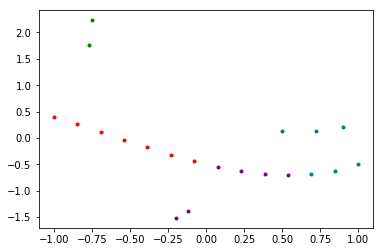

In [6]:
clusters = hierarchical(c1,4)
colors = ['green', 'purple', 'teal', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

> # Validation 

Credit to [https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/](http://) for this Validation portion

In [7]:
X = c1.as_matrix()
# generate the linkage matrix
complete_link = linkage(X, 'complete') # using complete link metric to evaluate 'distance' between clusters

 As you can see there's a lot of choice here and while python and scipy make it very easy to do the clustering, it's you who has to understand and make these choices.. This  compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering. 
 > The closer the value is to `1`, the better the clustering preserves the original distances, which in our case is reasonably close:

In [8]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [9]:
c, coph_dists = cophenet(complete_link, pdist(X))
c

0.82163457864334211

No matter what method and metric you pick, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. It will return an array of length `n - 1` giving you information about the `n - 1` cluster merges which it needs to pairwise merge n clusters. `complete_link[i]` will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

In [10]:
complete_link[0]

array([ 2.     ,  3.     ,  0.15085,  2.     ])

In its first iteration the linkage algorithm decided to merge the two clusters  with indices `2` and `3`, as they only had a distance of `0.15085`. This created a cluster with a total of `2` samples. 
> We can see that each row of the resulting array has the format `[idx1, idx2, dist, sample_count].`




In [11]:
complete_link[1]

array([ 16.     ,  17.     ,   0.15501,   2.     ])

In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices `16` and `17`, which had a distance of `0.15501`. This again formed another cluster with a total of `2` samples.

The indices of the clusters until now correspond to our samples. Remember that we had a total of 21 samples, so indices `0` to `20`. Let's have a look at the first `20` iterations:

In [12]:
complete_link[:20]

array([[  2.     ,   3.     ,   0.15085,   2.     ],
       [ 16.     ,  17.     ,   0.15501,   2.     ],
       [ 18.     ,  19.     ,   0.16793,   2.     ],
       [ 14.     ,  15.     ,   0.17501,   2.     ],
       [  5.     ,   6.     ,   0.19187,   2.     ],
       [ 12.     ,  13.     ,   0.19888,   2.     ],
       [  7.     ,   8.     ,   0.20598,   2.     ],
       [ 10.     ,  11.     ,   0.21264,   2.     ],
       [ 20.     ,  23.     ,   0.35953,   3.     ],
       [  4.     ,  25.     ,   0.40734,   3.     ],
       [  9.     ,  27.     ,   0.41782,   3.     ],
       [  0.     ,   1.     ,   0.47931,   2.     ],
       [ 22.     ,  24.     ,   0.4873 ,   4.     ],
       [ 26.     ,  28.     ,   0.61866,   4.     ],
       [ 29.     ,  30.     ,   0.91   ,   6.     ],
       [ 21.     ,  33.     ,   1.09587,   6.     ],
       [ 31.     ,  34.     ,   1.2505 ,   7.     ],
       [ 35.     ,  36.     ,   2.03924,  12.     ],
       [ 37.     ,  38.     ,   2.19317,  19. 

We can  observe the monotonic increase of the distance.

> A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

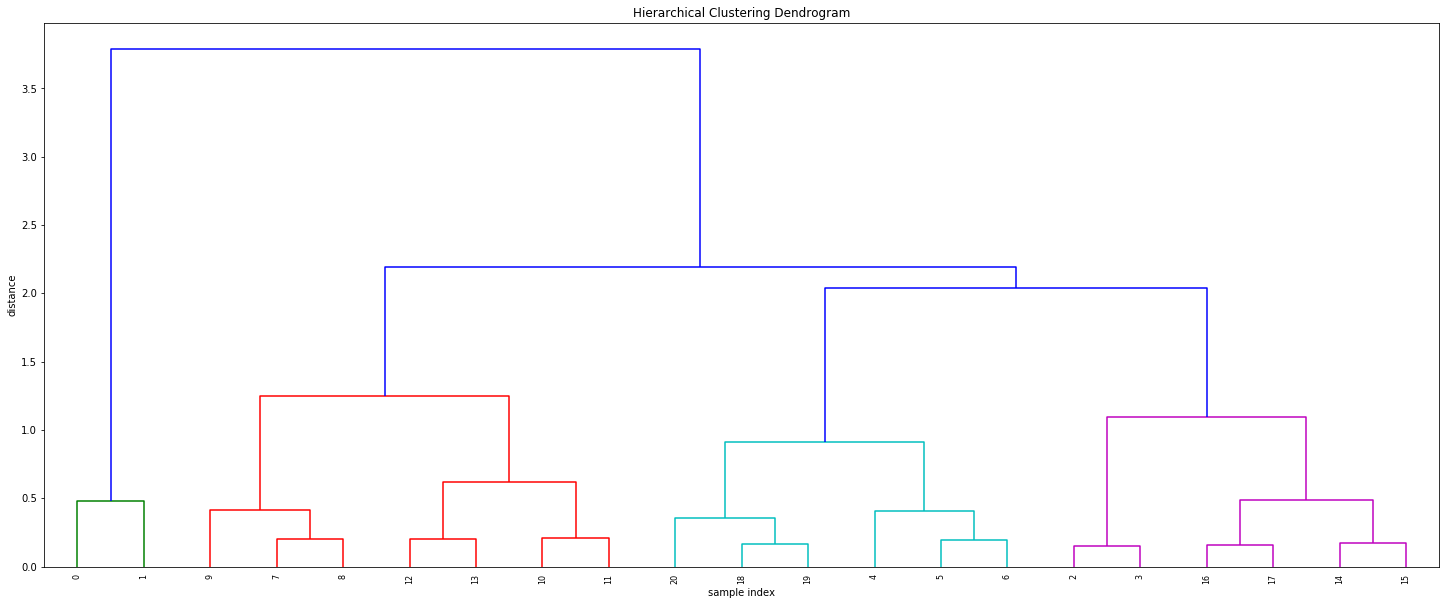

In [13]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    complete_link,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold= 1.5
)
plt.show()

Which doesnt  relally correspond similarly to our results as well

first cluster |  second cluster |  distance
2  |  3  |  0.15085042956518227
15  |  16  |  0.15501250939640307
16  |  17  |  0.1679299964569166
13  |  14  |  0.17501291697817623
4  |  5  |  0.19186599490269243
10  |  11  |  0.19888079280176854
5  |  6  |  0.20597708099371148
7  |  8  |  0.2126411284874588
11  |  12  |  0.35953226092257706
3  |  4  |  0.4073438351073943
4  |  5  |  0.4178159995817896
0  |  1  |  0.47931424457263944
6  |  7  |  0.4873016438456984
4  |  5  |  0.6186579968943826
2  |  6  |  0.9099990366171274
1  |  5  |  1.0958744328174146
3  |  4  |  1.2504959778494371


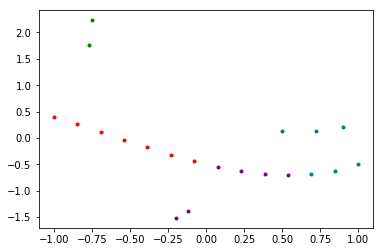

In [14]:
clusters = hierarchical(c1,4)
colors = ['green', 'purple', 'teal', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])